# Universidad de Buenos Aires
# Procesamiento de Lenguaje Natural - Desafio: 1
# Alumno: Matias Werbin

**1**. Vectorizar documentos. Tomar 5 documentos al azar y medir similaridad con el resto de los documentos.
Estudiar los 5 documentos más similares de cada uno analizar si tiene sentido
la similaridad según el contenido del texto y la etiqueta de clasificación.

**2**. Entrenar modelos de clasificación Naïve Bayes para maximizar el desempeño de clasificación
(f1-score macro) en el conjunto de datos de test. Considerar cambiar parámteros
de instanciación del vectorizador y los modelos y probar modelos de Naïve Bayes Multinomial
y ComplementNB.

**3**. Transponer la matriz documento-término. De esa manera se obtiene una matriz
término-documento que puede ser interpretada como una colección de vectorización de palabras.
Estudiar ahora similaridad entre palabras tomando 5 palabras y estudiando sus 5 más similares.

In [3]:
# Importacion de librerias
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.naive_bayes import MultinomialNB, ComplementNB
from sklearn.metrics import f1_score, accuracy_score
import numpy as np

# Importacion de fetch_20newsgroups para la descarga del dataset
from sklearn.datasets import fetch_20newsgroups


In [4]:
# Inspeccionamos fetch_20newsgroups para ver parametros que admite
#fetch_20newsgroups?

In [5]:
# Carga de datos de train y test

X_train, y_train = fetch_20newsgroups(subset='train', remove=('headers', 'footers', 'quotes'),return_X_y=True)
X_test, y_test = fetch_20newsgroups(subset='test', remove=('headers', 'footers', 'quotes'),return_X_y=True)

In [6]:
print(f"La longuitud de X_train es: {len(X_train)}")
print(f"La longuitud de X_test es: {len(X_test)}")
print(f"La longuitud de y_train es:{len(y_train)}")
print(f"La longuitud de y_test es: {len(y_test)}")

La longuitud de X_train es: 11314
La longuitud de X_test es: 7532
La longuitud de y_train es:11314
La longuitud de y_test es: 7532


In [7]:
# Revisamos un registro de train (documento), por ejemplo,el correspondiente al del índice 22

X_train[22]

'\n)>>   "The Catalog of Personal Computing Tools for Engineers and Scien-\n)>>   tists" lists hardware cards and application software packages for \n)>>   PC/XT/AT/PS/2 class machines.  Focus is on engineering and scien-\n)>>   tific applications of PCs, such as data acquisition/control, \n)>>   design automation, and data analysis and presentation.  \n\n)>>   If you would like a free copy, reply with your (U. S. Postal) \n)>>   mailing address.\n\nI have a copy of this catalog in front of me as I write this.\nIt does have tons of qool stuff in it. \nMy impression is that they try not to send it out to "browsers". It\nappears that if your not a buyer or an engineer they do not want to\nwaste a catalog on you. When you get a catalog there\'s a "VIP Code" you\nhave to give them "to ensure your continued subscription.".\nAnyway, if you want to get in touch with them, the company is\n\nPersonal Computing Tools\n550 Division Street\nCampbell, CA 95008\n(408) 378-8400 \n(They also have fax 

In [8]:
# Revisamos clase del documento 22

y_train[22] # el resultado nos devuelve un valor numerico que se asocia a una clase

6

In [9]:
# Obtener el nombre de las categorías
newsgroups_train = fetch_20newsgroups(subset='train', remove=('headers', 'footers', 'quotes'))
newsgroups_test = fetch_20newsgroups(subset='test', remove=('headers', 'footers', 'quotes'))
category_names_train = newsgroups_train.target_names
category_names_test = newsgroups_test.target_names

print('Categorías presentes en train')
print("")
for i, category in enumerate(category_names_train):
    print(f"Categoría {i}: {category}")
print("")

print('Categorias presentes en test')
print("")
for i, category in enumerate(category_names_test):
    print(f"Categoría {i}: {category}")

Categorías presentes en train

Categoría 0: alt.atheism
Categoría 1: comp.graphics
Categoría 2: comp.os.ms-windows.misc
Categoría 3: comp.sys.ibm.pc.hardware
Categoría 4: comp.sys.mac.hardware
Categoría 5: comp.windows.x
Categoría 6: misc.forsale
Categoría 7: rec.autos
Categoría 8: rec.motorcycles
Categoría 9: rec.sport.baseball
Categoría 10: rec.sport.hockey
Categoría 11: sci.crypt
Categoría 12: sci.electronics
Categoría 13: sci.med
Categoría 14: sci.space
Categoría 15: soc.religion.christian
Categoría 16: talk.politics.guns
Categoría 17: talk.politics.mideast
Categoría 18: talk.politics.misc
Categoría 19: talk.religion.misc

Categorias presentes en test

Categoría 0: alt.atheism
Categoría 1: comp.graphics
Categoría 2: comp.os.ms-windows.misc
Categoría 3: comp.sys.ibm.pc.hardware
Categoría 4: comp.sys.mac.hardware
Categoría 5: comp.windows.x
Categoría 6: misc.forsale
Categoría 7: rec.autos
Categoría 8: rec.motorcycles
Categoría 9: rec.sport.baseball
Categoría 10: rec.sport.hockey
Cate

In [10]:
# Diccionario para obtener categoria segun clase numerica
idx2class = {v: k for v, k in enumerate(category_names_train)}

print(idx2class)

{0: 'alt.atheism', 1: 'comp.graphics', 2: 'comp.os.ms-windows.misc', 3: 'comp.sys.ibm.pc.hardware', 4: 'comp.sys.mac.hardware', 5: 'comp.windows.x', 6: 'misc.forsale', 7: 'rec.autos', 8: 'rec.motorcycles', 9: 'rec.sport.baseball', 10: 'rec.sport.hockey', 11: 'sci.crypt', 12: 'sci.electronics', 13: 'sci.med', 14: 'sci.space', 15: 'soc.religion.christian', 16: 'talk.politics.guns', 17: 'talk.politics.mideast', 18: 'talk.politics.misc', 19: 'talk.religion.misc'}


Cantidad de registros por clase en y_train:
rec.autos: 594
comp.sys.mac.hardware: 578
comp.graphics: 584
sci.space: 593
talk.politics.guns: 546
sci.med: 594
comp.sys.ibm.pc.hardware: 590
comp.os.ms-windows.misc: 591
rec.motorcycles: 598
talk.religion.misc: 377
misc.forsale: 585
alt.atheism: 480
sci.electronics: 591
comp.windows.x: 593
rec.sport.hockey: 600
rec.sport.baseball: 597
soc.religion.christian: 599
talk.politics.mideast: 564
talk.politics.misc: 465
sci.crypt: 595

Cantidad de registros por clase en y_test:
rec.autos: 396
comp.windows.x: 395
alt.atheism: 319
talk.politics.mideast: 376
talk.religion.misc: 251
sci.med: 396
soc.religion.christian: 398
comp.graphics: 389
comp.os.ms-windows.misc: 394
rec.motorcycles: 398
comp.sys.mac.hardware: 385
misc.forsale: 390
talk.politics.guns: 364
sci.space: 394
comp.sys.ibm.pc.hardware: 392
sci.crypt: 396
rec.sport.baseball: 397
rec.sport.hockey: 399
talk.politics.misc: 310
sci.electronics: 393


Text(0, 0.5, 'Cantidad de registros')

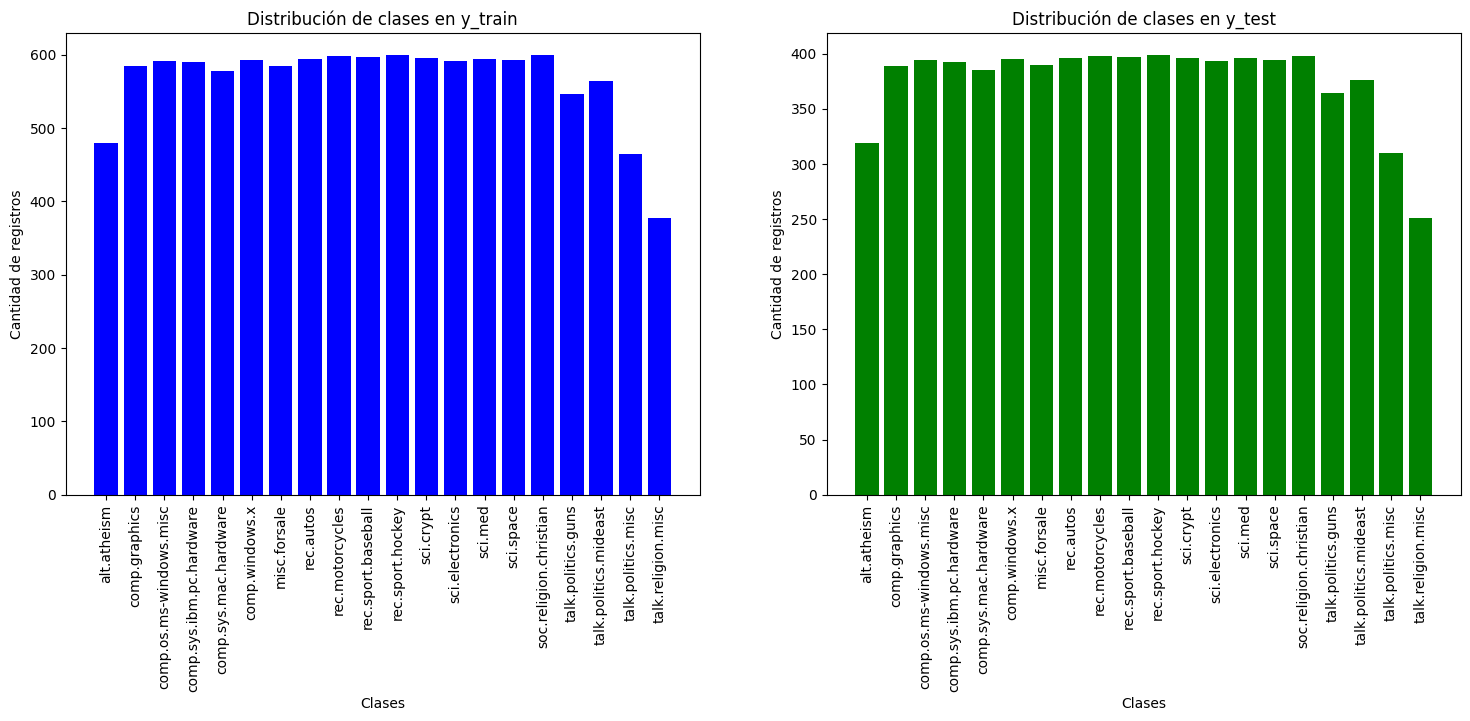

In [11]:
from collections import Counter
import matplotlib.pyplot as plt

# Contar la cantidad de registros por clase en y_train e y_test
train_counts = Counter(y_train)
test_counts = Counter(y_test)

# Imprimimos la cantidad de registros por clase en y_train
print("Cantidad de registros por clase en y_train:")
for category_index, count in train_counts.items():
    print(f"{category_names_train[category_index]}: {count}")

# Imprimimos la cantidad de registros por clase en y_test
print("\nCantidad de registros por clase en y_test:")
for category_index, count in test_counts.items():
    print(f"{category_names_test[category_index]}: {count}")

fig, ax = plt.subplots(1, 2, figsize=(18, 6))

# Plot for y_train
ax[0].bar(train_counts.keys(), train_counts.values(), color='blue')
ax[0].set_title('Distribución de clases en y_train')
ax[0].set_xticks(range(len(category_names_train)))
ax[0].set_xticklabels(category_names_train, rotation=90)
ax[0].set_xlabel('Clases')
ax[0].set_ylabel('Cantidad de registros')

# Plot for y_test
ax[1].bar(test_counts.keys(), test_counts.values(), color='green')
ax[1].set_title('Distribución de clases en y_test')
ax[1].set_xticks(range(len(category_names_test)))
ax[1].set_xticklabels(category_names_test, rotation=90)
ax[1].set_xlabel('Clases')
ax[1].set_ylabel('Cantidad de registros')


Podemos observar que las clases tanto en el conjunto de train como test, se encuentran bastante balanceadas.

Procedmos a vectorizar documentos mediante estrategia TfidVectorizer()

In [12]:
# Inspeccionamos TfidfVectorizer() para ver parametros que toma por defecto

# help(TfidfVectorizer())

In [13]:
# Incializamos TfidVectorizer con parametros default
tfidfvect = TfidfVectorizer()

In [14]:
# Vectorizamos
X_train_vec = tfidfvect.fit_transform(X_train)

In [15]:
print(type(X_train_vec))
print(f'shape: {X_train_vec.shape}')
print(f'cantidad de documentos: {X_train_vec.shape[0]}')
print(f'tamaño del vocabulario (dimensionalidad de los vectores): {X_train_vec.shape[1]}')

<class 'scipy.sparse._csr.csr_matrix'>
shape: (11314, 101631)
cantidad de documentos: 11314
tamaño del vocabulario (dimensionalidad de los vectores): 101631


In [16]:
import random

# Tomaremos 5 documentos al azar

random.seed(22)

# Seleccionamos 5 índices al azar
random_indices = random.sample(range(X_train_vec.shape[0]), 5)

# Extraemos los documentos correspondientes a estos índices
random_documents = X_train_vec[random_indices]

# Visualicemos el primer documento elegido y su categoria

print(X_train[random_indices[0]])
print("")
print(f"La categoría correspondiente es: {y_train[random_indices[0]]} = {idx2class[y_train[random_indices[0]]]}\n")



I am looking for a program I can insert into some code that will allow the title bar to be changed on a window dynamicly.  If one already is out there, I would appreciate a location so I don't have to create this from scratch.

La categoría correspondiente es: 5 = comp.windows.x



In [17]:
# Similitud coseno para el primer documento tomado al azar y el resto
idx=random_indices[0]
print(f"Índice de documento: {idx}")
print("")
print("Contenido del documento:")
print("")
print(X_train[random_indices[0]])
print("")
print(f"La categoría correspondiente es: {y_train[random_indices[0]]} = {idx2class[y_train[random_indices[0]]]}\n")

# Similitud coseno con todos los documentos de train
cossim = cosine_similarity(X_train_vec[idx], X_train_vec)[0]

# 5 documentos más similares
values_cossim=np.sort(cossim)[::-1] [1:6]
doc_cossim=np.argsort(cossim)[::-1] [1:6]

print("Los 5 documento mas simlares son:")
print("")
for doc_idx, sim_value in zip(doc_cossim, values_cossim):
    print(f"Índice del documento: {doc_idx}, Valor de similitud coseno: {sim_value} y la categoría correspondiente es: {y_train[doc_idx]} = {idx2class[y_train[doc_idx]]}\n")



Índice de documento: 2299

Contenido del documento:

I am looking for a program I can insert into some code that will allow the title bar to be changed on a window dynamicly.  If one already is out there, I would appreciate a location so I don't have to create this from scratch.

La categoría correspondiente es: 5 = comp.windows.x

Los 5 documento mas simlares son:

Índice del documento: 4377, Valor de similitud coseno: 0.2515493090120143 y la categoría correspondiente es: 5 = comp.windows.x

Índice del documento: 7933, Valor de similitud coseno: 0.2169712742633893 y la categoría correspondiente es: 5 = comp.windows.x

Índice del documento: 5525, Valor de similitud coseno: 0.21265787965643643 y la categoría correspondiente es: 5 = comp.windows.x

Índice del documento: 4614, Valor de similitud coseno: 0.2106451954966976 y la categoría correspondiente es: 5 = comp.windows.x

Índice del documento: 10112, Valor de similitud coseno: 0.2083995142178222 y la categoría correspondiente es: 2 = 

In [18]:
# Similitud coseno para el segundo documento tomado al azar y el resto
idx=random_indices[1]
print(f"Indice de documento: {idx}")
print("")
print("Contenido del documento:")
print("")
print(X_train[idx])
print("")
print(f"La categoría correspondiente es: {y_train[idx]} = {idx2class[y_train[idx]]}\n")

# Similitud coseno con todos los documentos de train
cossim = cosine_similarity(X_train_vec[idx], X_train_vec)[0]

# 5 documentos más similares
values_cossim=np.sort(cossim)[::-1] [1:6]
doc_cossim=np.argsort(cossim)[::-1] [1:6]

print("Los 5 documentos más simlares son:")
print("")
for doc_idx, sim_value in zip(doc_cossim, values_cossim):
    print(f"Índice del documento: {doc_idx}, Valor de similitud coseno: {sim_value} y la categoría correspondiente es: {y_train[doc_idx]} = {idx2class[y_train[doc_idx]]}\n")



Indice de documento: 3975

Contenido del documento:



Darius> Let me suggest this.  Maybe those who believe in the eternal
Darius> hell theory should provide all the biblical evidence they can
Darius> find for it.  Stay away from human theories, and only take
Darius> into account references in the bible.

Like most topics, we've been through this one before, but here is
a good start:  Matthew 25:46:

"Then they will go away to eternal punishment, but the righteous
to eternal life."

I may post more on this subject when I have more time.  In any
case, it is clear that the fate of the damned is most unpleasant,
and to be avoided.

David Wagner			"Sola Scriptura!"
a confessional Lutheran

La categoría correspondiente es: 15 = soc.religion.christian

Los 5 documentos más simlares son:

Índice del documento: 6403, Valor de similitud coseno: 0.36828494892647484 y la categoría correspondiente es: 15 = soc.religion.christian

Índice del documento: 458, Valor de similitud coseno: 0.26266550471

In [19]:
# Similitud coseno para el tercer documento tomado al azar y el resto
idx=random_indices[2]
print(f"Índice de documento: {idx}")
print("")
print("Contenido del documento:")
print("")
print(X_train[idx])
print("")
print(f"La categoría correspondiente es: {y_train[idx]} = {idx2class[y_train[idx]]}\n")

# Similitud coseno con todos los documentos de train
cossim = cosine_similarity(X_train_vec[idx], X_train_vec)[0]

# 5 documentos mas similares
values_cossim=np.sort(cossim)[::-1] [1:6]
doc_cossim=np.argsort(cossim)[::-1] [1:6]

print("Los 5 documentos más simlares son:")
print("")
for doc_idx, sim_value in zip(doc_cossim, values_cossim):
    print(f"Índice del documento: {doc_idx}, Valor de similitud coseno: {sim_value} y la categoría correspondiente es: {y_train[doc_idx]} = {idx2class[y_train[doc_idx]]}\n")



Índice de documento: 386

Contenido del documento:

Sci.E(E) netters:

I am setting out to build and market a small electronic device that 
requires an LCD display.  All of the analog electronics are working 
fine, I have ordered a PIC ICE (not vice versa) since the PICs are so 
cheap and low-power, but I am having a devil of a time finding any 
LCD displays in the 6-8 digit range that are priced as low as I need.  I 
am looking for somthing in the range of $1 in quantities of about 
1000-10,000.

Mainstream distributors like Almac cannot help me without a part 
number, or when they do look around for something in their line 
they find a $15 8-digit LCD.  Even Digikey's cheapest offering is $5 in 
quantity.

I know LCD displays like this must exist because I see whole 
calculators for sale for $4.99, meaning the retailer probably buys it 
for $3.50 and the wholesaler probably gets it for $2.50 or so.  This 
$2.50 includes assembly labor, packaging, sales, transportation, 
import duties

In [20]:
# Similitud coseno para el cuarto documento tomado al azar y el resto
idx=random_indices[3]
print(f"Índice de documento: {idx}")
print("")
print("Contenido documento")
print("")
print(X_train[idx])
print("")
print(f"La categoría correspondiente es: {y_train[idx]} = {idx2class[y_train[idx]]}\n")

# Similitud coseno con todos los documentos de train
cossim = cosine_similarity(X_train_vec[idx], X_train_vec)[0]

# 5 documentos mas similares
values_cossim=np.sort(cossim)[::-1] [1:6]
doc_cossim=np.argsort(cossim)[::-1] [1:6]

print("Los 5 documentos más simlares son:")
print("")
for doc_idx, sim_value in zip(doc_cossim, values_cossim):
    print(f"Índice del documento: {doc_idx}, Valor de similitud coseno: {sim_value} y la categoría correspondiente es: {y_train[doc_idx]} = {idx2class[y_train[doc_idx]]}\n")



Índice de documento: 10044

Contenido documento


It is a bit unfair to call blame the Clinton Administration alone...this
initiative was underway under the Bush Administration...it is basically
a bipartisan effort of the establishment Demopublicans and
Republicrats...the same bipartisan effort that brought the S&L scandal,
and BCCI, etc.

La categoría correspondiente es: 18 = talk.politics.misc

Los 5 documentos más simlares son:

Índice del documento: 9882, Valor de similitud coseno: 0.22703970858777328 y la categoría correspondiente es: 11 = sci.crypt

Índice del documento: 412, Valor de similitud coseno: 0.22586854039740267 y la categoría correspondiente es: 11 = sci.crypt

Índice del documento: 3746, Valor de similitud coseno: 0.20070866258349215 y la categoría correspondiente es: 18 = talk.politics.misc

Índice del documento: 1393, Valor de similitud coseno: 0.17942720526210715 y la categoría correspondiente es: 11 = sci.crypt

Índice del documento: 1182, Valor de similitud cosen

In [21]:
# Similitud coseno para el quinto documento tomado al azar y el resto
idx=random_indices[4]
print(f"Índice de documento: {idx}")
print("")
print("Contenido documento")
print("")
print(X_train[idx])
print("")
print(f"La categoría correspondiente es: {y_train[idx]} = {idx2class[y_train[idx]]}\n")

# Similitud coseno con todos los documentos de train
cossim = cosine_similarity(X_train_vec[idx], X_train_vec)[0]

# 5 documentos mas similares
values_cossim=np.sort(cossim)[::-1] [1:6]
doc_cossim=np.argsort(cossim)[::-1] [1:6]

print("Los 5 documentos más simlares son:")
print("")
for doc_idx, sim_value in zip(doc_cossim, values_cossim):
    print(f"Índice del documento: {doc_idx}, Valor de similitud coseno: {sim_value} y la categoría correspondiente es: {y_train[doc_idx]} = {idx2class[y_train[doc_idx]]}\n")



Índice de documento: 7325

Contenido documento

ALL I CAN SAY IS   




        G O    T I G E R S!!!!!!





La categoría correspondiente es: 9 = rec.sport.baseball

Los 5 documentos más simlares son:

Índice del documento: 3162, Valor de similitud coseno: 0.4269238527173849 y la categoría correspondiente es: 10 = rec.sport.hockey

Índice del documento: 8478, Valor de similitud coseno: 0.26892906473662187 y la categoría correspondiente es: 17 = talk.politics.mideast

Índice del documento: 7059, Valor de similitud coseno: 0.2577866280283646 y la categoría correspondiente es: 7 = rec.autos

Índice del documento: 354, Valor de similitud coseno: 0.2540732297046181 y la categoría correspondiente es: 15 = soc.religion.christian

Índice del documento: 5691, Valor de similitud coseno: 0.2395619843214295 y la categoría correspondiente es: 7 = rec.autos



**Conclusión punto 1)**

Al utilizar TfidfVectorizer(), creamos vectores esparsos de alta dimensionalidad, donde cada dimensión representa una palabra en el vocabulario. Al seleccionar 5 documentos aleatorios y compararlos con los 5 documentos que tienen la mayor similitud coseno, observamos que no siempre pertenecen a la misma categoría o subcategoría. En algunos casos, incluso difieren significativamente en categoría. Esto puede atribuirse a varios factores.

Por un lado, la alta dimensionalidad puede incluir una gran cantidad de palabras irrelevantes o ruidosas que aumentan el valor de la similitud coseno sin tener una relación semántica significativa. Esto hace que documentos de diferentes categorías parezcan similares debido a términos comunes pero no informativos.

Además, también puede existir diversidad temática dentro de las categorías. Es decir, algunas categorías pueden ser más diversas temáticamente que otras, lo que hace que documentos dentro de la misma categoría no sean necesariamente muy similares entre sí.

In [22]:
# Inspeccionamos MultinomialNB() para ver parametros que toma por defecto

#help(MultinomialNB())

In [23]:
# Inicializamos un clasificador bayesiano Moltinomial

bayes=MultinomialNB()
bayes.fit(X_train_vec, y_train)

MultinomialNB()

In [24]:
X_test_vec = tfidfvect.transform(X_test)
y_pred =  bayes.predict(X_test_vec)
print(f"f1-score: {f1_score(y_test, y_pred, average='macro')} Accuracy: {accuracy_score(y_test,y_pred)}")

f1-score: 0.5854345727938506 Accuracy: 0.6062134891131173


In [25]:
# Inicializamos un clasificador Complement NB

complement=ComplementNB()
complement.fit(X_train_vec, y_train)

ComplementNB()

In [26]:
y_pred =  complement.predict(X_test_vec)
print(f"f1-score: {f1_score(y_test, y_pred, average='macro')} Accuracy: {accuracy_score(y_test,y_pred)}")

f1-score: 0.692953349950875 Accuracy: 0.7145512480084971


In [27]:
from sklearn.naive_bayes import BernoulliNB

bernoulli=BernoulliNB()
bernoulli.fit(X_train_vec, y_train)


BernoulliNB()

In [28]:
y_pred =  bernoulli.predict(X_test_vec)
print(f"f1-score: {f1_score(y_test, y_pred, average='macro')} Accuracy: {accuracy_score(y_test,y_pred)}")

f1-score: 0.42866948824103135 Accuracy: 0.4579129049389272


**Conclusión 2):**

Se puede observar que el mejor modelo para categorizar documentos es el ComplementNB() siendo sustancialmente superior a MultinomialNB() y BernoulliNB().

In [29]:
# Transponemos la matriz documento-término para obtener la matriz término-documento
X_term_doc = X_train_vec.T

In [30]:
vocab = tfidfvect.get_feature_names_out()

# Seleccionar 5 palabras aleatorias del vocabulario
words = ['sports', 'game', 'team', 'player', 'league']

# Verificamos que las palbras estan en el vocabulario
words_in_vocab = [word for word in words if word in vocab]
print("Mostrar las palabras encontradas en el vocabulario:")
for word in words_in_vocab:
    print(word)

Mostrar las palabras encontradas en el vocabulario:
sports
game
team
player
league


In [31]:
words_indices=np.where(np.isin(vocab, words))[0]

similarity_scores = cosine_similarity(X_term_doc[words_indices], X_term_doc)

for i, word in enumerate(words):
    print(f"Palabra:{word}")

    # Obtenemos los índices de las palabras más similares
    top_similar_indices = np.argsort(similarity_scores[i])[::-1][1:6]

    # Obtenemos las palabras más similares y sus puntajes de similitud
    top_similar_words = [vocab[idx] for idx in top_similar_indices]
    top_similar_scores = similarity_scores[i, top_similar_indices]

    for j, similar_word in enumerate(top_similar_words):
        print(f"  {j+1}. {similar_word} - Similitud Coseno: {top_similar_scores[j]:.4f}")
    print()

Palabra:sports
  1. games - Similitud Coseno: 0.2116
  2. espn - Similitud Coseno: 0.1935
  3. hockey - Similitud Coseno: 0.1806
  4. team - Similitud Coseno: 0.1786
  5. scored - Similitud Coseno: 0.1707

Palabra:game
  1. kkeller - Similitud Coseno: 0.3595
  2. quakers - Similitud Coseno: 0.3592
  3. ivy - Similitud Coseno: 0.3558
  4. keller - Similitud Coseno: 0.3551
  5. champs - Similitud Coseno: 0.3514

Palabra:team
  1. grounder - Similitud Coseno: 0.2802
  2. sac - Similitud Coseno: 0.2360
  3. team - Similitud Coseno: 0.2254
  4. credited - Similitud Coseno: 0.2178
  5. players - Similitud Coseno: 0.2131

Palabra:player
  1. wip - Similitud Coseno: 0.3699
  2. rockin - Similitud Coseno: 0.3599
  3. pollute - Similitud Coseno: 0.3599
  4. jockeys - Similitud Coseno: 0.3599
  5. admittdly - Similitud Coseno: 0.2565

Palabra:league
  1. teams - Similitud Coseno: 0.2634
  2. player - Similitud Coseno: 0.2254
  3. nhl - Similitud Coseno: 0.2247
  4. win - Similitud Coseno: 0.1957


**Conclusión 3):**

Podemos observar que para varias de las palabras elegidas, la similitud coseno nos ha arrojado palabras que podríamos encontrar en contextos lingüísticos similares. Por ejemplo:

* **league:** las 5 palabras más similares según la similitud coseno son `teams`, `player`, `nhl`, `win` y `player`.
* **sports:** las 5 palabras más similares según la similitud coseno son `games`, `espn`, `hockey`, `team` y `scored`.

Sin embargo, también obtuvimos algunos resultados menos coherentes o claros. Por ejemplo:

* **game:** las 5 palabras más similares según la similitud coseno son `kkeller`, `quakers`, `ivy`, `keller` y `champs`.

Estas discrepancias pueden surgir debido a la naturaleza de los contextos en los que las palabras aparecen y cómo estos contextos son capturados en la representación vectorial. Es importante recordar que la similitud coseno mide la co-ocurrencia en documentos, lo cual no siempre se alinea perfectamente con la similitud semántica que podríamos esperar intuitivamente.
